In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import talib as ta
from matplotlib import pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import warnings
import seaborn as sns
warnings.simplefilter('ignore')
import japanize_matplotlib

In [2]:
train = pd.read_csv('train_finance.csv')
test = pd.read_csv('test_finance.csv')
submit = pd.read_csv('submit_finance.csv')

In [3]:
train.head()

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259


In [4]:
test.head()

,Date,High,Low,Open,Close
0,2011-12-15,120.703596,119.907182,120.132990,120.139231
1,2011-12-16,121.027367,120.314249,120.527453,120.524311
2,2011-12-19,120.629617,120.111145,120.582444,120.591872
3,2011-12-20,121.470779,120.221987,120.323633,120.322078
4,2011-12-21,122.046150,120.513328,121.063789,121.063789


In [5]:
submit.head()

,Date
0,2011-12-22
1,2012-01-05
2,2012-01-19
3,2012-02-02
4,2012-02-16


In [6]:
train.isnull().sum()

Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64

In [7]:
test.isnull().sum()

Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64

In [8]:
train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [9]:
test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


### 当日の終値と翌日の始値の差分を計算

In [10]:
# 当日の終値と翌日の始値の差分をdiff
df_diff = train['Open'].shift(-1) - train['Close']
df_diff = df_diff.fillna(0)
train['diff'] = df_diff
train.head()

,Date,High,Low,Open,Close,diff
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,-0.037061
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,0.009461
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,-0.027181
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,-0.026994
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,-0.175559


In [11]:
# 当日の終値と翌日の始値の差分をdiff
df_diff = test['Open'].shift(-1) - test['Close']
df_diff = df_diff.fillna(0)
test['diff'] = df_diff
test.head()

,Date,High,Low,Open,Close,diff
0,2011-12-15,120.703596,119.907182,120.132990,120.139231,0.388223
1,2011-12-16,121.027367,120.314249,120.527453,120.524311,0.058134
2,2011-12-19,120.629617,120.111145,120.582444,120.591872,-0.268239
3,2011-12-20,121.470779,120.221987,120.323633,120.322078,0.741711
4,2011-12-21,122.046150,120.513328,121.063789,121.063789,-0.462478


### 上昇した日と下降した日の割合確認

In [12]:
#データ数を確認
m = len(train["Close"])
m

2074

In [13]:
mm = len(test["Close"])
mm

1246

In [14]:
#上昇した日と下降した日の割合
print(len(train[(train['diff'] >= 0)]) / m * 100)
print(len(train[(train['diff'] < 0)]) / m * 100)

56.99132111861138
43.008678881388626


In [15]:
print(len(test[(test['diff'] >= 0)]) / mm * 100)
print(len(test[(test['diff'] < 0)]) / mm * 100)

49.83948635634029
50.16051364365971


### 翌日の始値が上昇した日を「１」下降した日を「０」に変換

In [16]:
#上昇した日を１下降した日を０
mask1 = train['diff'] > 0
mask2 = train['diff'] < 0
column_name = 'diff'
train.loc[mask1, column_name] = 1
train.loc[mask2, column_name] = 0

In [17]:
train

,Date,High,Low,Open,Close,diff
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0.0
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1.0
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0.0
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0.0
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0.0
...,...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661,0.0
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260,1.0
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906,0.0
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361,0.0


In [18]:
#上昇した日を１下降した日を０
mask1 = test['diff'] > 0
mask2 = test['diff'] < 0
column_name = 'diff'
test.loc[mask1, column_name] = 1
test.loc[mask2, column_name] = 0

In [19]:
test

,Date,High,Low,Open,Close,diff
0,2011-12-15,120.703596,119.907182,120.132990,120.139231,1.0
1,2011-12-16,121.027367,120.314249,120.527453,120.524311,1.0
2,2011-12-19,120.629617,120.111145,120.582444,120.591872,0.0
3,2011-12-20,121.470779,120.221987,120.323633,120.322078,1.0
4,2011-12-21,122.046150,120.513328,121.063789,121.063789,0.0
...,...,...,...,...,...,...
1241,2019-12-19,103.067513,102.766359,102.822331,102.822331,0.0
1242,2019-12-26,102.720708,102.515796,102.629538,102.632956,1.0
1243,2019-12-27,103.421288,102.674990,102.686502,102.685356,1.0
1244,2019-12-30,103.791471,103.429382,103.429382,103.436318,1.0


In [20]:
#diffをtargetにリネーム
train.rename(columns={"diff" : "y"}, inplace=True)
test.rename(columns={"diff" : "y"}, inplace=True)

### trainデータのLowの異常値を抽出して、前日と翌日の平均で代入

In [21]:
train[train["Low"]<10]

,Date,High,Low,Open,Close,y
1115,2008-03-17,147.103265,6.743457,145.669288,145.669288,0.0


In [22]:
train[train["Date"]=="2008-03-14"]

,Date,High,Low,Open,Close,y
1114,2008-03-14,145.059359,143.736202,144.513188,144.465784,1.0


In [23]:
train[train["Date"]=="2008-03-18"]

,Date,High,Low,Open,Close,y
1116,2008-03-18,146.409411,144.456764,145.660125,144.83676,1.0


In [24]:
# 異常値に前後の日の平均を代入
(143.736202 + 144.456764)/2

144.09648299999998

In [25]:
train.loc[1115,"Low"] = 144.09648299999998

In [26]:
train[train["Date"]=="2008-03-17"]

,Date,High,Low,Open,Close,y
1115,2008-03-17,147.103265,144.096483,145.669288,145.669288,0.0


In [27]:
train.describe()

,High,Low,Open,Close,y
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.976785,123.526205,123.529490,0.437319
std,9.210193,9.155624,9.188003,9.184970,0.496175
min,108.520946,107.748581,107.993884,107.998923,0.000000
25%,117.002707,115.876669,116.408944,116.427990,0.000000
50%,123.242134,121.954434,122.590435,122.573382,0.000000
75%,130.814157,129.426294,130.201913,130.179930,1.000000
max,148.260942,146.834717,147.832063,147.888796,1.000000


In [28]:
train_close = train["Close"]
test_close = test["Close"]

#### talibでテクニカル指標の特徴量追加（移動平均,macd,macdsignal,macdhist,RSI,ボリンジャーバンド）

In [29]:
#移動平均追加トレイン
span01 = 5
span02 = 20
span03 = 40

train["sma01"] = train_close.rolling(window = span01).mean()/train_close
train["sma02"] = train_close.rolling(window = span02).mean()/train_close
train["sma03"] = train_close.rolling(window = span03).mean()/train_close


In [30]:
#移動平均追加テスト
span01 = 6
span02 = 24
span03 = 48

test["sma01"] = test_close.rolling(window = span01).mean()/test_close
test["sma02"] = test_close.rolling(window = span02).mean()/test_close
test["sma03"] = test_close.rolling(window = span03).mean()/test_close

In [31]:
#欠損値を中央値で埋める
train["sma01"] = train["sma01"].fillna(train["sma01"].median())
train["sma02"] = train["sma02"].fillna(train["sma02"].median())
train["sma03"] = train["sma03"].fillna(train["sma03"].median())

In [32]:
#欠損値を中央値で埋める
test["sma01"] = test["sma01"].fillna(test["sma01"].median())
test["sma02"] = test["sma02"].fillna(test["sma02"].median())
test["sma03"] = test["sma03"].fillna(test["sma03"].median())

In [33]:
#MACD取得
train["macd"],train["macdsignal"],train["macdhist"] = ta.MACD(train_close, fastperiod=12, slowperiod=26,signalperiod=9)
test["macd"],test["macdsignal"],test["macdhist"] = ta.MACD(test_close, fastperiod=12, slowperiod=26,signalperiod=9)


In [34]:
#欠損値を中央値で埋める
train["macd"] = train["macd"].fillna(train["macd"].median())
train["macdsignal"] = train["macdsignal"].fillna(train["macdsignal"].median())
train["macdhist"] = train["macdhist"].fillna(train["macdhist"].median())

In [35]:
test.head()

,Date,High,Low,Open,Close,y,sma01,sma02,sma03,macd,macdsignal,macdhist
0,2011-12-15,120.703596,119.907182,120.132990,120.139231,1.0,1.000271,1.000976,1.001926,NaN,NaN,NaN
1,2011-12-16,121.027367,120.314249,120.527453,120.524311,1.0,1.000271,1.000976,1.001926,NaN,NaN,NaN
2,2011-12-19,120.629617,120.111145,120.582444,120.591872,0.0,1.000271,1.000976,1.001926,NaN,NaN,NaN
3,2011-12-20,121.470779,120.221987,120.323633,120.322078,1.0,1.000271,1.000976,1.001926,NaN,NaN,NaN
4,2011-12-21,122.046150,120.513328,121.063789,121.063789,0.0,1.000271,1.000976,1.001926,NaN,NaN,NaN


In [36]:
#欠損値を中央値で埋める
test["macd"] = test["macd"].fillna(test["macd"].median())
test["macdsignal"] = test["macdsignal"].fillna(test["macdsignal"].median())
test["macdhist"] = test["macdhist"].fillna(test["macdhist"].median())

In [37]:
test

,Date,High,Low,Open,Close,y,sma01,sma02,sma03,macd,macdsignal,macdhist
0,2011-12-15,120.703596,119.907182,120.132990,120.139231,1.0,1.000271,1.000976,1.001926,-0.047563,-0.050310,-0.008003
1,2011-12-16,121.027367,120.314249,120.527453,120.524311,1.0,1.000271,1.000976,1.001926,-0.047563,-0.050310,-0.008003
2,2011-12-19,120.629617,120.111145,120.582444,120.591872,0.0,1.000271,1.000976,1.001926,-0.047563,-0.050310,-0.008003
3,2011-12-20,121.470779,120.221987,120.323633,120.322078,1.0,1.000271,1.000976,1.001926,-0.047563,-0.050310,-0.008003
4,2011-12-21,122.046150,120.513328,121.063789,121.063789,0.0,1.000271,1.000976,1.001926,-0.047563,-0.050310,-0.008003
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2019-12-19,103.067513,102.766359,102.822331,102.822331,0.0,1.002325,0.997836,0.998591,0.091262,-0.003099,0.094361
1242,2019-12-26,102.720708,102.515796,102.629538,102.632956,1.0,1.003568,0.999456,1.000229,0.072547,0.012030,0.060517
1243,2019-12-27,103.421288,102.674990,102.686502,102.685356,1.0,1.001781,0.998736,0.999557,0.061237,0.021871,0.039365
1244,2019-12-30,103.791471,103.429382,103.429382,103.436318,1.0,0.995370,0.991543,0.992251,0.111583,0.039814,0.071770


In [38]:
train["RSI"] =ta.RSI(train_close,timeperiod = span02)
test["RSI"] =ta.RSI(test_close,timeperiod = span02)

In [39]:
#欠損値を中央値で埋める
train["RSI"] = train["RSI"].fillna(train["RSI"].median())
test["RSI"] = test["RSI"].fillna(test["RSI"].median())

In [40]:
#ボリンジャーバンド
train["upper"],train["middle"],train["lower"] = ta.BBANDS(train_close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)
test["upper"],test["middle"],test["lower"] = ta.BBANDS(test_close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)

In [41]:
train["upper"] = train["upper"].fillna(train["upper"].median())
train["middle"] = train["middle"].fillna(train["middle"].median())
train["lower"] = train["lower"].fillna(train["lower"].median())

In [42]:
test["upper"] = test["upper"].fillna(test["upper"].median())
test["middle"] = test["middle"].fillna(test["middle"].median())
test["lower"] = test["lower"].fillna(test["lower"].median())

In [43]:
train.head()

,Date,High,Low,Open,Close,y,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0.0,0.991961,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878


In [44]:
# [Date]をdatetime型に変更
train['Date'] = pd.to_datetime(train['Date'], format='%Y/%m/%d')
test['Date'] = pd.to_datetime(test['Date'], format='%Y/%m/%d')
submit['Date'] = pd.to_datetime(submit['Date'], format='%Y/%m/%d')
train.head()

,Date,High,Low,Open,Close,y,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0.0,0.999668,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0.0,0.991961,0.998728,0.997972,0.131587,0.132298,0.006929,51.552415,125.751131,122.410988,119.208878


In [45]:
# monthカラムの追加
# train['month'] = train['Date'].dt.month
# test['month'] = test['Date'].dt.month
# train.head()

In [46]:
#monthをダミー変数に
# train = pd.get_dummies(train, columns=['month'])
# test = pd.get_dummies(test, columns=['month'])

In [47]:
train.set_index(keys='Date', inplace=True)
test.set_index(keys='Date', inplace=True)
submit.set_index(keys='Date', inplace=True)

In [48]:
print(train.shape)
print(test.shape)

(2074, 15)
(1246, 15)


In [49]:
#始まり値と終値の差分追加
train['Body'] = train['Open'] - train['Close']
test['Body'] = test['Open'] - test['Close']

In [50]:
# 当日の終値と翌日の始値の差分をdiff
# df_diff = train['Open'].shift(-1) - train['Close']
# df_diff = df_diff.fillna(0)
# train['diff'] = df_diff
# train.head()

In [51]:
# 当日の終値と翌日の始値の差分をdiff
# df_diff = test['Open'].shift(-1) - test['Close']
# df_diff = df_diff.fillna(0)
# test['diff'] = df_diff
# test.head()

In [52]:
#5日分のdiffの平均 train
# train['diff_avg'] = 0
# df_diff_avg = train["diff"][0:5].mean()
# train['diff_avg'][0:5] = df_diff_avg

In [53]:
# repeat_time = int(len(train)/5)+1
# for i in range(repeat_time):
#     start = i * 5
#     end = start + 5
#     df_diff_avg = train["diff"][start:end].mean()
#     train['diff_avg'][start:end] = df_diff_avg

In [54]:
# #6日分のdiffの平均 test
# test['diff_avg'] = 0
# df_diff_avg = test["diff"][0:6].mean()
# test['diff_avg'][0:6] = df_diff_avg

In [55]:
# repeat_time = int(len(test)/6)+1
# for i in range(repeat_time):
#     start = i * 6
#     end = start + 6
#     df_diff_avg = test["diff"][start:end].mean()
#     test['diff_avg'][start:end] = df_diff_avg

### ヒートマップで相関関係確認

<AxesSubplot:>

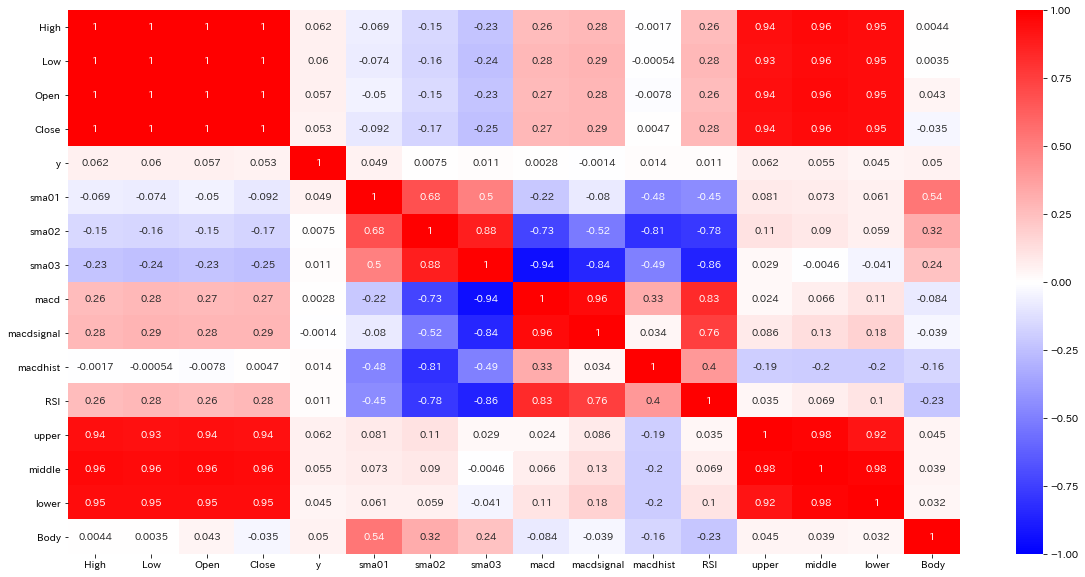

In [56]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),cmap="bwr",annot=True,vmax=1,vmin=-1,center=0)

### 重回帰分析（StatsModels）

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
df = train

In [59]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'y', 'sma01', 'sma02', 'sma03', 'macd',
       'macdsignal', 'macdhist', 'RSI', 'upper', 'middle', 'lower', 'Body'],
      dtype='object')

In [60]:
x = df[['High', 'Low', 'Open', 'Close', 'sma01', 'sma02', 'sma03', 'macd',
        'macdsignal', 'macdhist', 'RSI', 'upper', 'middle', 'lower', 'Body'
        ]] # ←増減可能 
y = df['y']

In [61]:
X = sm.add_constant(x)

In [62]:
mdl = sm.OLS(y, X)
result = mdl.fit()

#### tの数値の絶対値が多いと目的変数に与える影響が大きい

In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     10.15
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.92e-22
Time:                        22:23:06   Log-Likelihood:                -1419.7
No. Observations:                2074   AIC:                             2869.
Df Residuals:                    2059   BIC:                             2954.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9972      5.675     -0.352      0.725     -13.127       9.132
High           0.2361      0.030      7.923      0.000       0.178       0.295
Low            0.2266      0.029      7.846      0.000       0.170       0.283
Open          -0.2289      0.027     -8.554      0.000      -0.281      -0.176
Close         -0.2494      0.037     -6.806      0.000      -0.321      -0.178
sma01          4.8295      5.503      0.878      0.380      -5.962      15.621
sma02         -1.8232      6.692     -0.272      0.785     -14.947      11.300
sma03         -1.1694      3.488     -0.335      0.737      -8.009       5.671
macd         -24.7167     25.161     -0.982      0.326     -74.059      24.626
macdsignal    24.6759     25.195      0.979      0.328     -24.735      74.087
macdhist      24.7466     25.286      0.979      0.328     -24.842      74.335
RSI            0.0039      0.003      1.398      0.162      -0.002       0.009
upper         -2.7401      3.609     -0.759      0.448      -9.818       4.338
middle         5.5065      7.258      0.759      0.448      -8.728      19.741
lower         -2.7479      3.610     -0.761      0.447      -9.827       4.331
Body           0.0206      0.019      1.109      0.268      -0.016       0.057
==============================================================================
Omnibus:                     9359.895   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.881
Skew:                           0.249   Prob(JB):                     3.37e-60
Kurtosis:                       1.291   Cond. No.                     7.60e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 説明変数の"middle","sma02","sma03"を削除

In [64]:
drop_col = ["middle","sma02","sma03"]
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [66]:
# 学習用
x_train = train.drop('y', axis=1)
y_train = train['y']

In [67]:
#検証用
x_test = test.drop('y', axis=1)
y_test = test['y']

### クロスバリデーション（交差検証）

In [68]:
#交差検証
estimator = LogisticRegression(random_state = 1)
kf=KFold(n_splits=3,shuffle=True,random_state=1)
result=cross_val_score(estimator,x_train,y_train,cv=kf);
print("accuracy=",result.mean())

accuracy= 0.6118607251505037


### グリッドサーチ（ハイパーパラメーター調整）

In [69]:
#パラメータ範囲指定
param_grid = [{
    "penalty":["none","l1","l2"],
    "C":[0.01,0.1,1,10,100],
    "class_weight":[1,2,3]}]

In [70]:
cv=10

In [71]:
tuned_model = GridSearchCV(estimator=estimator,param_grid=param_grid,
                          cv=cv,return_train_score=False)

In [72]:
tuned_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'class_weight': [1, 2, 3],
                          'penalty': ['none', 'l1', 'l2']}])

In [73]:
#交差検証
# kf=KFold(n_splits=3,shuffle=True,random_state=1)
# result=cross_val_score(tuned_model,x_train,y_train,cv=kf);
# print("accuracy=",result.mean())

In [74]:
pred_check = tuned_model.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_check)

0.6998394863563403

In [76]:
np.set_printoptions(threshold=np.inf)
print(pred_check)

[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.

In [77]:
tuned_model.best_params_

{'C': 0.01, 'class_weight': 1, 'penalty': 'none'}

### 確率値のチューニング

In [78]:
from sklearn.metrics import precision_recall_fscore_support

In [79]:
#確率値の取得
def pred(tuned_model,x_train,thres):
    y_proba = tuned_model.predict_proba(x_test)
    y_probal = y_proba[:,1]
    y_pred = (y_probal > thres).astype(int)
    return y_pred

In [80]:
thres_list = np.arange(0.5,0,-0.05)
thres_list

array([0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05])

### 闘値を0.05ずつ減らした時の適合率、再現率、Ｆ値を計算
#### 適合率＝正解（１と予測）と予測したうちに実際に正例（答え１）だった割合
#### 再現率＝正例(答え１）のうち、正しく予測（１と予測）できた割合
#### Ｆ値＝適合率、再現率の調和平均

In [81]:
thres_list = np.arange(0.5,0,-0.05)

for thres in thres_list:
    y_pred = pred(tuned_model,x_test,thres)
    pred_sum = y_pred.sum()
    precision,recall,fscore,_ =precision_recall_fscore_support(y_test,y_pred,average="binary")
    print(f'闘値:{thres:.2f} 陽性予測数:{pred_sum}\適合率:{precision:.4f} 再現率:{recall:.4f} F値:{fscore:.4f})')

闘値:0.50 陽性予測数:371\適合率:0.8248 再現率:0.4976 F値:0.6207)
闘値:0.45 陽性予測数:527\適合率:0.7799 再現率:0.6683 F値:0.7198)
闘値:0.40 陽性予測数:744\適合率:0.7097 再現率:0.8585 F値:0.7770)
闘値:0.35 陽性予測数:922\適合率:0.6161 再現率:0.9236 F値:0.7391)
闘値:0.30 陽性予測数:1060\適合率:0.5632 再現率:0.9707 F値:0.7128)
闘値:0.25 陽性予測数:1157\適合率:0.5281 再現率:0.9935 F値:0.6896)
闘値:0.20 陽性予測数:1214\適合率:0.5058 再現率:0.9984 F値:0.6714)
闘値:0.15 陽性予測数:1236\適合率:0.4968 再現率:0.9984 F値:0.6634)
闘値:0.10 陽性予測数:1242\適合率:0.4944 再現率:0.9984 F値:0.6613)
闘値:0.05 陽性予測数:1245\適合率:0.4932 再現率:0.9984 F値:0.6602)


In [82]:
y_final = pred(tuned_model,x_test,0.438)

In [83]:
#y_final = pred(tuned_model,x_test,0.438)

In [84]:
accuracy_score(y_test, y_final)

0.7608346709470305

In [85]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [86]:
precision,recall,thresholds = precision_recall_curve(y_test,y_final)

## モデルの精度評価

### PR曲線 = 閾値を変えた場合に適合率、再現率がどうかわるか表した図

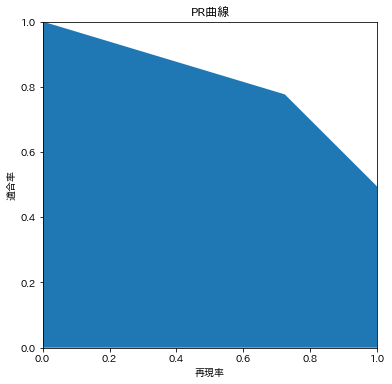

In [87]:
plt.figure(figsize=(6,6))
plt.fill_between(recall,precision,0)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel("再現率")
plt.ylabel("適合率")
plt.title("PR曲線")
plt.show()

In [88]:
fpr,tpr,thresholds = roc_curve(y_test,y_final,drop_intermediate=False)

### ROC曲線 = 閾値を変えた場合に偽陽性率、敏感度がどうかわるか表した図
##### 偽陽性率とは、負例（答え0）のものの中で、間違って１と予測した割合です
##### 敏感度とは、再現率と同意 「正例（答え１）のうち、正しく予測（１と予測）できた割合」
##### 敏感度が高く、偽陽性率が低い状態は、左上のほうの点で表されます。すなわち、ROC曲線が左上に寄っているほど「良い判定」ということになります。


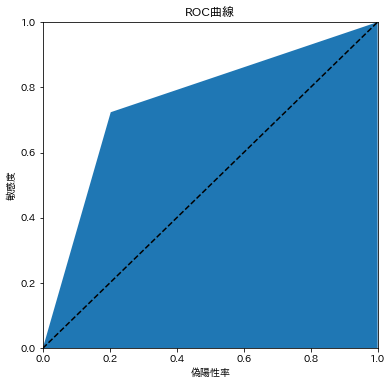

In [89]:
plt.figure(figsize=(6,6))

plt.plot([0,1],[0,1],"k--")
plt.fill_between(fpr,tpr,0)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel("偽陽性率")
plt.ylabel("敏感度")
plt.title("ROC曲線")
plt.show()

In [90]:
#ROC曲線下面積 高性能 0.9-1.0 中性能 0.7-0.9 低性能 0.5-0.7 
roc_auc = auc(fpr,tpr)
print(f'ROC曲線下面積:{roc_auc:.4f}')

ROC曲線下面積:0.7604


### 混同行列

In [91]:
df_matrix = confusion_matrix(y_test,y_final)
pd.DataFrame(df_matrix)

,0,1
0,503,128
1,170,445


In [95]:
x_test["y"] = y_final
x_test.head(30)

,High,Low,Open,Close,sma01,macd,macdsignal,macdhist,RSI,upper,lower,Body,y
Date,,,,,,,,,,,,,
2011-12-15,120.703596,119.907182,120.132990,120.139231,1.000271,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,-0.006241,1
2011-12-16,121.027367,120.314249,120.527453,120.524311,1.000271,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,0.003143,1
2011-12-19,120.629617,120.111145,120.582444,120.591872,1.000271,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,-0.009428,0
2011-12-20,121.470779,120.221987,120.323633,120.322078,1.000271,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,0.001555,1
2011-12-21,122.046150,120.513328,121.063789,121.063789,1.000271,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,0.000000,1
2011-12-22,121.351259,120.467798,120.601311,120.620178,0.999365,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,-0.018867,1
2011-12-29,119.731799,118.966469,119.563110,119.577026,1.007299,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,-0.013916,0
2011-12-30,120.212615,119.381024,119.807785,119.843490,1.004113,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,-0.035705,1
2012-01-02,119.916510,119.533757,119.880761,119.880761,1.002812,-0.047563,-0.05031,-0.008003,49.181063,110.201575,105.827045,0.000000,0


In [93]:
submit = submit.join(x_test['y'])

In [94]:
submit

,y
Date,
2011-12-22,1
2012-01-05,0
2012-01-19,1
2012-02-02,0
2012-02-16,0
...,...
2019-10-23,0
2019-11-07,0
2019-11-21,0


In [95]:
now = dt.now()
timestamp = now.strftime('%m%d_%H-%M-%S')
submit.to_csv(f'all_{timestamp}.csv')